In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout

In [2]:
test_df = pd.read_csv("/Users/dinamaizlis/Desktop/dl/sign_mnist_test.csv")

In [3]:
#I took the data of the first two image - the pixels
test=test_df[:2:]

In [4]:
y_test= test.pop('label').values
x_test = test.values

In [5]:
test  = np.array(x_test)
test  = test.reshape(x_test.shape[0],28,28,1)

In [6]:
## View the images

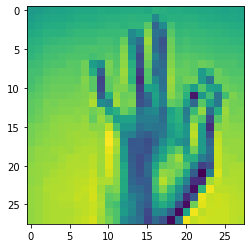

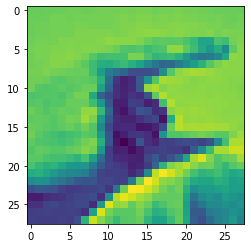

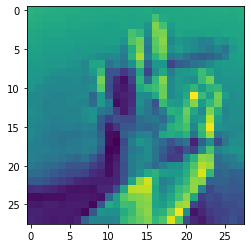

In [7]:
plt.imshow(np.reshape(test[1],(28,28)))
plt.show()
plt.imshow(np.reshape(test[0],(28,28)))
plt.show()
plt.imshow(np.reshape(test[0]-test[1],(28,28)))
plt.show()

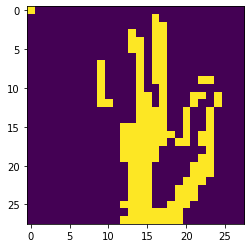

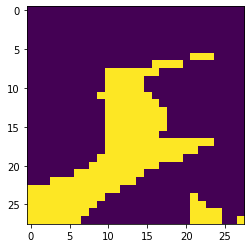

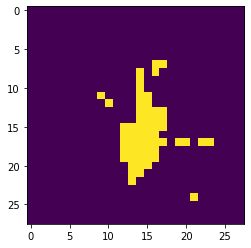

In [8]:
#Find the different pixels between the images

img1=test[1]<test[1].mean()-20
plt.imshow(np.reshape(img1,(28,28)))
plt.show()

img2=test[0]<test[0].mean()-20
plt.imshow(np.reshape(img2,(28,28)))
plt.show()

img1=img1.astype(np.float32)
img2=img2.astype(np.float32)

img3=(img1+img2)>=2
plt.imshow(np.reshape(img3,(28,28)))
plt.show()

In [9]:
# get the spicel index
# img3=img3.astype(np.float32)
# ii = np.where(img3 == 1)[0]
# spicel_index=np.random.choice(ii,4)
# spicel_index

In [10]:
#get the the different pixels- indexs
img3=img3.astype(np.float32)
spicel_index = np.where(img3 == 1)[0]

In [11]:
spicel_index=spicel_index.tolist()
spicel_index.insert(0,0)
print(f"{len(spicel_index)}")

59


In [12]:
#the data
test_df = pd.read_csv("/Users/dinamaizlis/Desktop/dl/sign_mnist_test.csv")
train_df = pd.read_csv("/Users/dinamaizlis/Desktop/dl/sign_mnist_train.csv")

In [13]:
test_df=test_df.loc[test_df['label'].isin([5,6])]
train_df=train_df.loc[train_df['label'].isin([5,6])]

In [14]:
print(f"{train_df.shape = }")
print(f"{test_df.shape = }")

train_df.shape = (2294, 785)
test_df.shape = (595, 785)


/Users/dinamaizlis/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


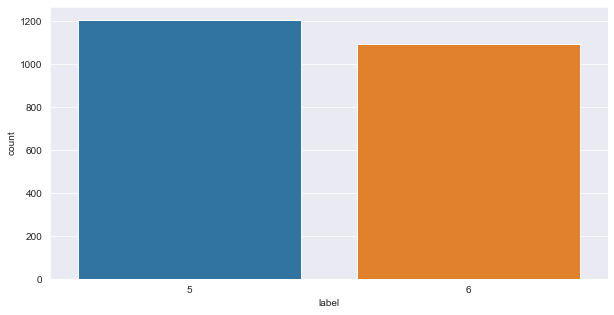

In [15]:
#Visualization
plt.figure(figsize = (10,5))
sns.set_style("darkgrid")
sns.countplot(train_df['label'])
plt.show()

In [16]:
train_df_spcific_pixel=train_df.iloc[:, spicel_index]
test_df_spcific_pixel=test_df.iloc[:, spicel_index]

In [17]:
#test/train data
y_train_spcific_pixel= train_df_spcific_pixel.pop('label').values
x_train_spcific_pixel = train_df_spcific_pixel.values
y_test_spcific_pixel= test_df_spcific_pixel.pop('label').values
x_test_spcific_pixel = test_df_spcific_pixel.values


y_train= train_df.pop('label').values
x_train = train_df.values
y_test= test_df.pop('label').values
x_test = test_df.values

# models

## KNN model

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
#All pixels
model = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print(" {} knn score: {} ".format(3,model.score(x_test,y_test)))

 3 knn score: 0.9831932773109243 


In [20]:
#part of the pixels
model = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
model.fit(x_train_spcific_pixel,y_train_spcific_pixel)
prediction = model.predict(x_test_spcific_pixel)
print(" {} knn score: {} ".format(3,model.score(x_test_spcific_pixel,y_test_spcific_pixel)))

 3 knn score: 0.6756302521008404 


## RANDOM_FOREST model

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
#All pixels
rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("random forest score: ",rf.score(x_test,y_test))

random forest score:  0.9966386554621849


In [23]:
#part of the pixels
rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train_spcific_pixel,y_train_spcific_pixel)
print("random forest score: ",rf.score(x_test_spcific_pixel,y_test_spcific_pixel))

random forest score:  0.6873949579831933


## LogisticRegression model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
#All pixels
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("LogisticRegression score: ",model.score(x_test,y_test))

LogisticRegression score:  0.9647058823529412


/Users/dinamaizlis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
#part of the pixels
model = LogisticRegression()
model.fit(x_train_spcific_pixel, y_train_spcific_pixel)
y_pred = model.predict(x_test_spcific_pixel)
print("LogisticRegression score: ",model.score(x_test_spcific_pixel,y_test_spcific_pixel))

LogisticRegression score:  0.6285714285714286


/Users/dinamaizlis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#try

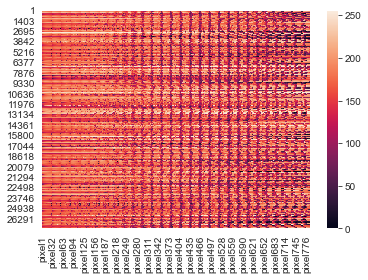

In [27]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(train_df)
#ax = sns.heatmap(train_df[::20])

In [28]:
train = np.array(train_df)
test  = np.array(test_df)
train = train.reshape(train.shape[0],28,28,1)
test  = test.reshape(test.shape[0],28,28,1)

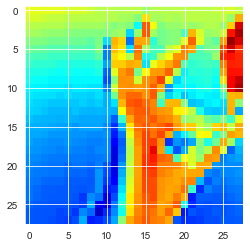

In [29]:
import cv2
plt.imsave('test.png',np.reshape(test[5],(28,28)))
img = cv2.imread('test.png', 1)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
heatmap_img = cv2.applyColorMap(gray_img, cv2.COLORMAP_JET)
plt.imshow(heatmap_img)